In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

## Autour du paradoxe de Simpson
### Contexte
En 1972-1974, à Whickham, une ville du nord-est de l'Angleterre, située à environ 6,5 kilomètres au sud-ouest de Newcastle upon Tyne, un sondage d'un sixième des électeurs a été effectué afin d'éclairer des travaux sur les maladies thyroïdiennes et cardiaques (Tunbridge et al. 1977). Une suite de cette étude a été menée vingt ans plus tard (Vanderpump et al. 1995). Certains des résultats avaient trait au tabagisme et cherchaient à savoir si les individus étaient toujours en vie lors de la seconde étude. Par simplicité, nous nous restreindrons aux femmes et parmi celles-ci aux 1314 qui ont été catégorisées comme "fumant actuellement" ou "n'ayant jamais fumé". Il y avait relativement peu de femmes dans le sondage initial ayant fumé et ayant arrêté depuis (162) et très peu pour lesquelles l'information n'était pas disponible (18). La survie à 20 ans a été déterminée pour l'ensemble des femmes du premier sondage.
<br>
<br>
Lien du jeu de données : [jeu de données](https://gitlab.inria.fr/learninglab/mooc-rr/mooc-rr-ressources/blob/master/module3/Practical_session/Subject6_smoking.csv)

In [2]:
data = pd.read_csv("Subject6_smoking.csv")
data.head()

,Smoker,Status,Age
0,Yes,Alive,21.0
1,Yes,Alive,19.3
2,No,Dead,57.5
3,No,Alive,47.1
4,Yes,Alive,81.4


### Inspection des données

In [3]:
data.isna().any()

Smoker    False
Status    False
Age       False
dtype: bool

Comme nous le voyons il n'y a pas de données manquantes dans ce jeu de données

## Première tache
Représentez dans un tableau le nombre total de femmes vivantes et décédées sur la période en fonction de leur habitude de tabagisme. Calculez dans chaque groupe (fumeuses / non fumeuses) le taux de mortalité (le rapport entre le nombre de femmes décédées dans un groupe et le nombre total de femmes dans ce groupe)

In [4]:
smoker_agg =  data.groupby(['Smoker', 'Status']).agg('count')
smoker_agg.columns = ['Number_of_cases']
smoker_agg = smoker_agg.reset_index()
smoker_agg

,Smoker,Status,Number_of_cases
0,No,Alive,502
1,No,Dead,230
2,Yes,Alive,443
3,Yes,Dead,139


In [5]:
# Taux de mortalité dans le groupe de fumeuses
smoker_dead_num = float(smoker_agg[(smoker_agg.Smoker=="Yes") & (smoker_agg.Status=="Dead")]['Number_of_cases'])
mortality_smoke = 100*smoker_dead_num / smoker_agg[smoker_agg.Smoker=='Yes']['Number_of_cases'].sum()
print("Le taux de mortalité chez les fumeuses est de : "+str(round(mortality_smoke,2))+' %')


Le taux de mortalité chez les fumeuses est de : 23.88 %


In [7]:
# Taux de mortalité dans le groupe des non fumeuses
nosmoker_dead_num = float(smoker_agg[(smoker_agg.Smoker=="No") & (smoker_agg.Status=="Dead")]['Number_of_cases'])
mortality_nosmoke = 100*nosmoker_dead_num / smoker_agg[smoker_agg.Smoker=='No']['Number_of_cases'].sum()
print("Le taux de mortalité chez les non fumeuses est de : "+str(round(mortality_nosmoke,2))+' %')


Le taux de mortalité chez les non fumeuses est de : 31.42 %


### Représentation graphique

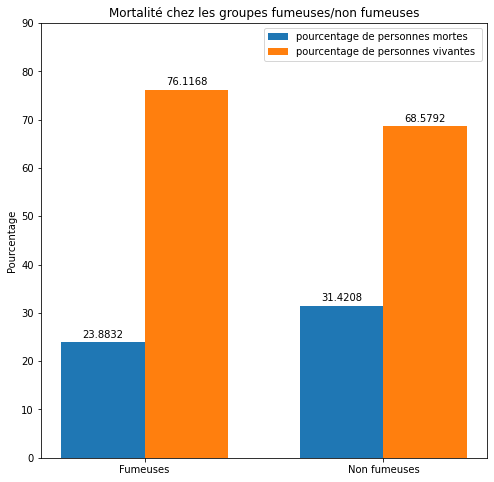

In [8]:

labels = ['Fumeuses', 'Non fumeuses']
d1 = [mortality_smoke, mortality_nosmoke]
d2 = [100-mortality_smoke, 100-mortality_nosmoke]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize = (8,8))
rects1 = ax.bar(x - width/2, d1, width, label='pourcentage de personnes mortes')
rects2 = ax.bar(x + width/2, d2, width, label = "pourcentage de personnes vivantes ")
ax.set_ylabel('Pourcentage')
ax.set_title('Mortalité chez les groupes fumeuses/non fumeuses')
ax.set_xticks(x)
plt.yticks(np.arange(0, 100, 10))
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


plt.show()

In [39]:
def ratio_mortality(df):
    # Taux de mortalité dans le groupe des non fumeuses
    nosmoker_dead_num = float(df[(df.Smoker=="No") & (df.Status=="Dead")]['Number_of_cases'])
    mortality_nosmoke = 100*nosmoker_dead_num / df[df.Smoker=='No']['Number_of_cases'].sum()
    mortality_nosmoke = round(mortality_nosmoke,2)
    
    # Taux de mortalité dans le groupe des  fumeuses
    smoker_dead_num = float(df[(df.Smoker=="Yes") & (df.Status=="Dead")]['Number_of_cases'])
    mortality_smoke = 100*smoker_dead_num / df[df.Smoker=='Yes']['Number_of_cases'].sum()
    mortality_smoke = round(mortality_smoke,2)
    return [mortality_nosmoke, mortality_smoke]

In [40]:
def class_separation(df):
    smoker_agg =  df.groupby(['Smoker', 'Status']).agg('count')
    smoker_agg.columns = ['Number_of_cases']
    smoker_agg = smoker_agg.reset_index()
    return smoker_agg


## Seconde tache
Reprenez la question 1 (effectifs et taux de mortalité) en rajoutant une nouvelle catégorie liée à la classe d'âge. On considérera par exemple les classes suivantes : 18-34 ans, 34-54 ans, 55-64 ans, plus de 65 ans. En quoi ce résultat est-il surprenant ? Arrivez-vous à expliquer ce paradoxe ? De même, vous pourrez proposer une représentation graphique de ces données pour étayer vos explications.

In [43]:
g1 = class_separation(data[(data.Age>=18)&(data.Age<34)])
g2 = class_separation(data[(data.Age>=34)&(data.Age<=54)])
g3 = class_separation(data[(data.Age>54)&(data.Age<=64)])
g4 = class_separation(data[data.Age>64])

#Mortality per category
m1 = ratio_mortality(g1)
m2 = ratio_mortality(g2)
m3 = ratio_mortality(g3)
m4 = ratio_mortality(g4)

## Représentation graphique

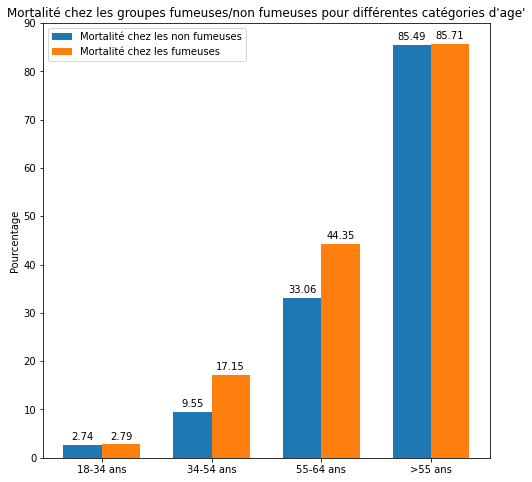

In [45]:

labels = ['18-34 ans', '34-54 ans', '55-64 ans', '>55 ans']
d1 = [m1[0], m2[0], m3[0], m4[0]]
d2 = [m1[1], m2[1], m3[1], m4[1]]
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize = (8,8))
rects1 = ax.bar(x - width/2, d1 , width, label='Mortalité chez les non fumeuses')
rects2 = ax.bar(x + width/2, d2 , width, label = "Mortalité chez les fumeuses")
ax.set_ylabel('Pourcentage')
ax.set_title("Mortalité chez les groupes fumeuses/non fumeuses pour différentes catégories d'age'")
ax.set_xticks(x)
plt.yticks(np.arange(0, 100, 10))
ax.set_xticklabels(labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)


plt.show()

### Troisième tache
Afin d'éviter un biais induit par des regroupements en tranches d'âges arbitraires et non régulières, il est envisageable d'essayer de réaliser une régression logistique. Si on introduit une variable Death valant 1 ou 0 pour indiquer si l'individu est décédé durant la période de 20 ans, on peut étudier le modèle Death ~ Age pour étudier la probabilité de décès en fonction de l'âge selon que l'on considère le groupe des fumeuses ou des non fumeuses. Ces régressions vous permettent-elles de conclure sur la nocivité du tabagisme ? Vous pourrez proposer une représentation graphique de ces régressions (en n'omettant pas les régions de confiance).

In [65]:
new_data = data[data.Age<=30]
new_data =  new_data.replace("Alive", 0)
new_data = new_data.replace("Dead", 1)

In [69]:
new_data.head()

,Smoker,Status,Age
0,Yes,0,21.0
1,Yes,0,19.3
6,No,0,23.8
8,Yes,0,24.8
10,Yes,0,30.0


In [70]:
smoke_group = new_data[new_data.Smoker=="Yes"]
nosmoke_group = new_data[new_data.Smoker=="No"]

#### Premier cas : le groupe des fumeuses

In [86]:
log_reg1 = smf.logit(formula = "Status ~ Age", data = smoke_group).fit()
log_reg1.summary()

Optimization terminated successfully.
         Current function value: 0.078375
         Iterations 9


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                  131
Model:                          Logit   Df Residuals:                      129
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Jan 2022   Pseudo R-squ.:                0.007889
Time:                        01:43:22   Log-Likelihood:                -10.267
converged:                       True   LL-Null:                       -10.349
                                        LLR p-value:                    0.6862
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -6.1874      5.247     -1.179      0.238     -16.471       4.096
Age            0.0810      0.204      0.396      0.692      -0.320       0.482
==============================================================================
"""

#### Second cas : le groupe des non fumeuses

In [87]:
log_reg2 = smf.logit(formula = "Status ~ Age", data = nosmoke_group).fit()
log_reg2.summary()

Optimization terminated successfully.
         Current function value: 0.138191
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Status   No. Observations:                  170
Model:                          Logit   Df Residuals:                      168
Method:                           MLE   Df Model:                            1
Date:                Fri, 07 Jan 2022   Pseudo R-squ.:                 0.09495
Time:                        01:44:12   Log-Likelihood:                -23.492
converged:                       True   LL-Null:                       -25.957
                                        LLR p-value:                   0.02640
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.7845      3.934     -2.741      0.006     -18.496      -3.073
Age            0.2976      0.148      2.012      0.044       0.008       0.587
==============================================================================
"""